In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format
data = pd.read_csv('new_file_emi.csv')

In [0]:
data.set_index('lead_id', inplace=True)
data = data[data['dmi_cibil_score'] > 399]
data.drop(['dmi_cibil_score'], axis = 1, inplace=True)
data = data[(data['salary'] > 6000) & (data['salary'] < 200000) & (~data.salary.isin([50000,100000,150000]))]
backup_data = data.copy()

In [67]:
data.drop('salary', axis=1, inplace=True)
xTrain, xTest, yTrain, yTest = train_test_split(data, data_backup['salary'], test_size = 0.20, random_state = 1)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)
train_data = pd.concat([xTrain, yTrain], axis=1)
test_data = pd.concat([xTest, yTest], axis=1)

(4268, 120)
(1068, 120)
(4268,)
(1068,)


In [48]:
data = data_backup.copy()
data.replace(0, np.nan, inplace=True)

# Find correlations with the target and sort
correlations = data.loc[:, (~ data.columns.str.endswith('count'))].corr()['salary'].sort_values(ascending = False)
print(correlations.to_string())

salary                                         1.00
againstsecurity_loan_total                     0.72
toprofessional_emi_total                       0.65
toprofessional_emi_max                         0.64
unsecuredbusiness_emi_total                    0.59
toprofessional_loan_total                      0.55
againstsecurity_loan_max                       0.52
toprofessional_loan_max                        0.51
unsecuredbusiness_emi_max                      0.49
personal_loan_total                            0.36
kisancredit_card_max                           0.35
kisancredit_card_total                         0.34
personal_loan_max                              0.34
housing_loan_total                             0.34
unsecuredbusiness_loan_max                     0.33
housing_loan_max                               0.30
housing_emi_max                                0.26
housing_emi_total                              0.26
againstdeposit_loan_max                        0.24
auto(p)_loan

In [5]:
# housing and auto separate corelation
data = data_backup.copy()
data.replace(0, np.nan, inplace=True)
print(data['housing_loan_total'].count(), data['auto(p)_loan_total'].count())
print(data['housing_loan_total'].corr(data['salary']), data['housing_loan_max'].corr(data['salary']))
print(data['auto(p)_loan_total'].corr(data['salary']), data['auto(p)_loan_max'].corr(data['salary']))

911 1177
0.34054836840952585 0.2960741261729584
0.23446029170254978 0.23697692947693663


In [6]:
# housing and auto combined corelation and its comparison with them separately
data = data_backup.copy()
data = data[(data['housing_loan_max'] >0) & (data['auto(p)_loan_max'] > 0)]
data['ha_max'] = data[['housing_loan_max', 'auto(p)_loan_max']].max(axis=1)
data['ha_total'] = data['housing_loan_max']+ data['auto(p)_loan_max']
print("sample count",len(data.index))
print(data['housing_loan_total'].corr(data['salary']), data['housing_loan_max'].corr(data['salary']))
print(data['auto(p)_loan_total'].corr(data['salary']), data['auto(p)_loan_max'].corr(data['salary']))
print(data['ha_total'].corr(data['salary']), data['ha_max'].corr(data['salary']))


sample count 333
0.2642510805490896 0.2327082328353035
0.12952338596753826 0.14425173063764674
0.24015413957676082 0.22796694212126897


In [7]:
data = data_backup.copy()
data.replace(0, np.nan, inplace=True)
# data = data[(data['personal_loan_max'] >0) & (data['consumer_loan_max'] > 0)]
data['pc_max'] = data[['personal_loan_max', 'consumer_loan_max']].max(axis=1)
data['pc_total'] = data['personal_loan_max']+ data['consumer_loan_max']
print(data['personal_loan_max'].count(),data['consumer_loan_max'].count())
print(data['personal_loan_total'].corr(data['salary']), data['personal_loan_max'].corr(data['salary']))
print(data['consumer_loan_total'].corr(data['salary']), data['consumer_loan_max'].corr(data['salary']))
print(data['pc_total'].corr(data['salary']), data['pc_max'].corr(data['salary']))

2505 3192
0.3593176535514146 0.34332123764426287
0.18102698095017644 0.15687744165251433
0.4334679162524464 0.31293115538787997


sample count 96
againstdeposit_loan_max:-  0.23398763861863925
model score : 0.0547502150263267


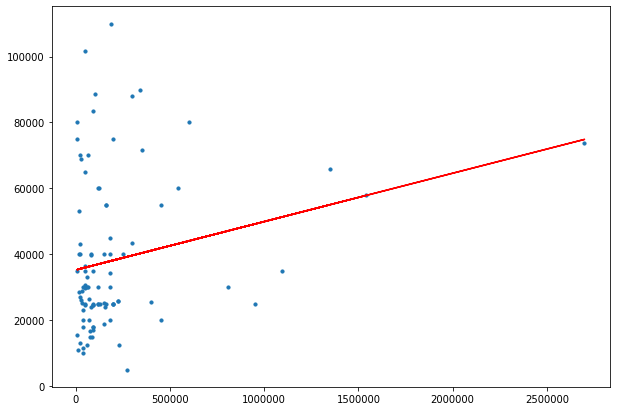

In [8]:
data = data_backup.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['againstdeposit_loan_max'].notnull()]
# data = data[(~data.salary.isin([50000,100000]))]
data = data[(data.againstdeposit_loan_max < 9000000) & (data.againstdeposit_loan_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("againstdeposit_loan_max:- ",data['againstdeposit_loan_max'].corr(data['salary']))
x_train = data[['againstdeposit_loan_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 21
againstdeposit_loan_max:-  0.049521417221046804
model score : 0.12243250606395051


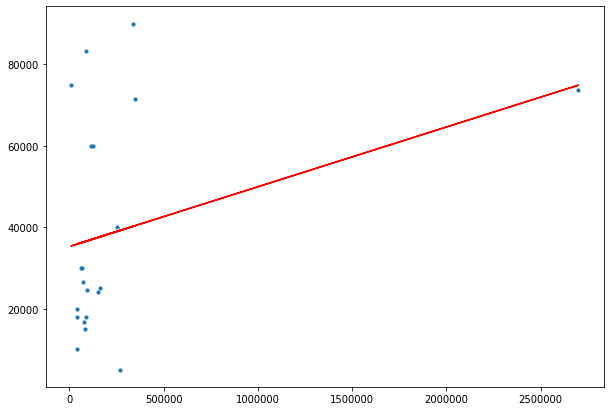

In [9]:
data = test_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['againstdeposit_loan_max'].notnull()]
x_test = data[['againstdeposit_loan_max']]
y_test = data[['salary']]
# data = data[(~data.salary.isin([50000,100000]))]
# data = data[(data.againstdeposit_loan_max < 9000000) & (data.againstdeposit_loan_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("againstdeposit_loan_max:- ",test_data['againstdeposit_loan_max'].corr(test_data['salary']))
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()

sample count 38
unsecuredbusiness_loan_max:-  0.3303205877251508
model score : 0.10911169067508908


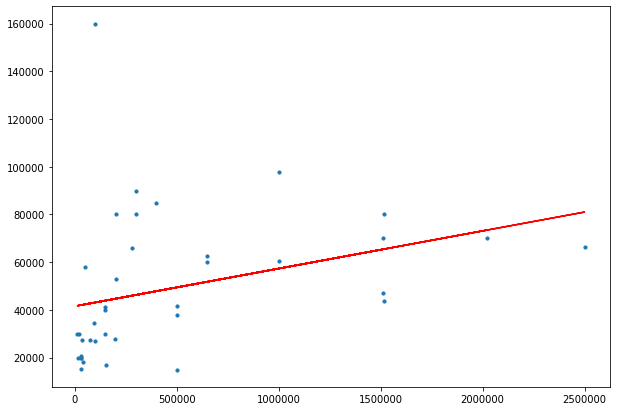

In [10]:
data = train_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['unsecuredbusiness_loan_max'].notnull()]
# data = data[(~data.salary.isin([50000,100000]))]
data = data[(data.unsecuredbusiness_loan_max < 9000000) & (data.unsecuredbusiness_loan_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("unsecuredbusiness_loan_max:- ",data['unsecuredbusiness_loan_max'].corr(data['salary']))
x_train = data[['unsecuredbusiness_loan_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 6
unsecuredbusiness_loan_max:-  0.279371808938947
model score : 0.032156149538783096


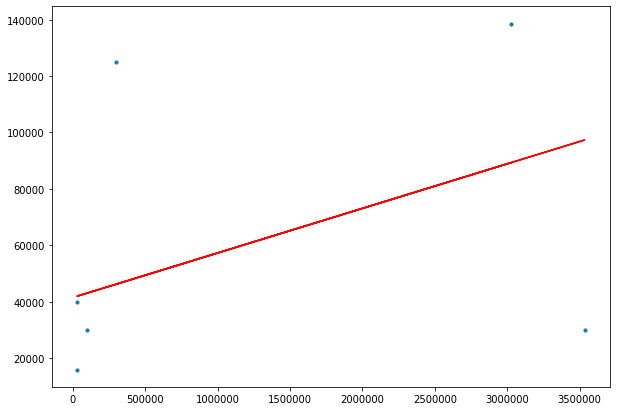

In [11]:
data = test_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['unsecuredbusiness_loan_max'].notnull()]
# data = data[(~data.salary.isin([50000,100000]))]
data = data[(data.unsecuredbusiness_loan_max < 9000000) & (data.unsecuredbusiness_loan_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("unsecuredbusiness_loan_max:- ",data['unsecuredbusiness_loan_max'].corr(data['salary']))
x_test = data[['unsecuredbusiness_loan_max']]
y_test = data[['salary']]
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()

sample count 489
housing_emi_max:-  0.23900616154480253
model score : 0.057123945256380315


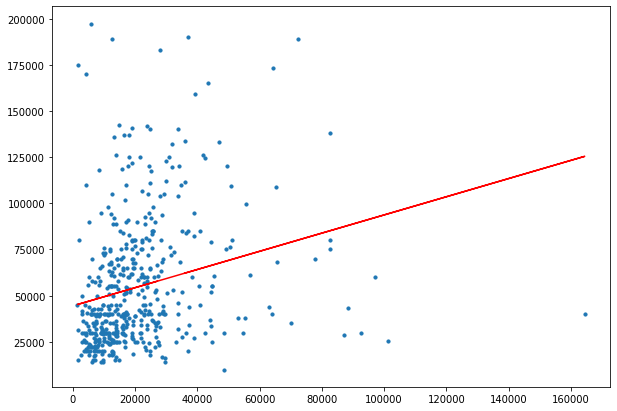

In [19]:
data = train_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['housing_emi_max'].notnull()]
# data = data[(~data.salary.isin([50000,100000]))]
data = data[(data.housing_emi_max < 9000000) & (data.housing_emi_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("housing_emi_max:- ",data['housing_emi_max'].corr(data['salary']))
x_train = data[['housing_emi_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 115
housing_emi_max:-  0.3691711474161438
model score : 0.09488697048888206


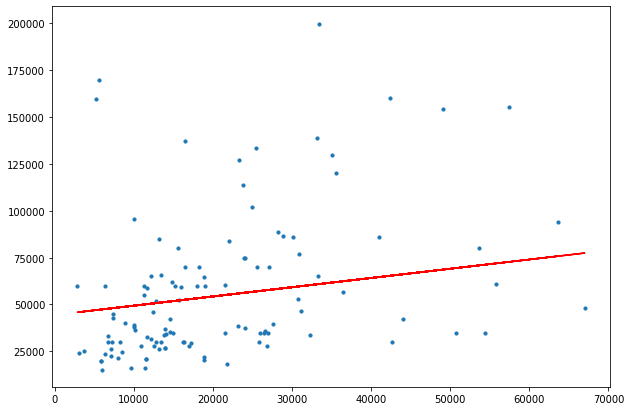

In [20]:
data = test_data.copy()
data.replace(0, np.nan, inplace=True)
# data = data[data['housing_emi_max'].notnull()]
# data = data[(~data.salary.isin([50000,100000]))]
data = data[(data.housing_emi_max < 9000000) & (data.housing_emi_max > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("housing_emi_max:- ",data['housing_emi_max'].corr(data['salary']))
x_test = data[['housing_emi_max']]
y_test = data[['salary']]
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()

sample count 728
housing_loan_max:-  0.3700695243227269
model score : 0.13695145283244925


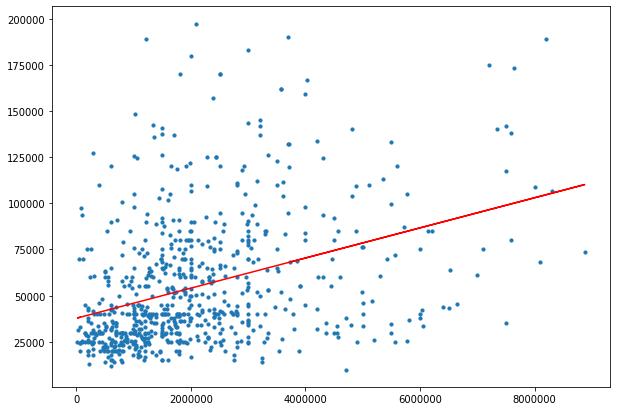

In [61]:
data = train_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['housing_loan_max'].notnull()]
data = data[(data.housing_loan_max < 9500000) & (data.housing_loan_max > 10000)]
print("sample count",len(data.index))
print("housing_loan_max:- ",data['housing_loan_max'].corr(data['salary']))
x_train = data[['housing_loan_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 1068
housing_loan_max:-  0.3916801652299167
model score : 0.13186844692071598


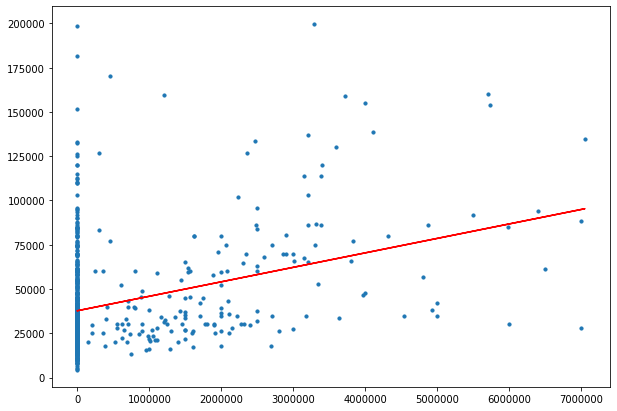

In [58]:
data = test_data.copy()
# data.replace(0, np.nan, inplace=True)
data.loc[~((data['housing_loan_max'] < 10000000) & (data['housing_loan_max'] > 1000)), 'housing_loan_max'] = 0
print("sample count",len(data.index))
print("housing_loan_max:- ",data['housing_loan_max'].corr(data['salary']))
x_test = data[['housing_loan_max']]
y_test = data[['salary']]
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()
test_data['pred_housing_loan_max'] = y_pred
test_data.loc[~((test_data['housing_loan_max'] < 9000000) & (test_data['housing_loan_max'] > 1000)), 'pred_housing_loan_max'] = np.nan

sample count 1907
personal_loan_max:-  0.35656075638094176
model score : 0.12713557299094946


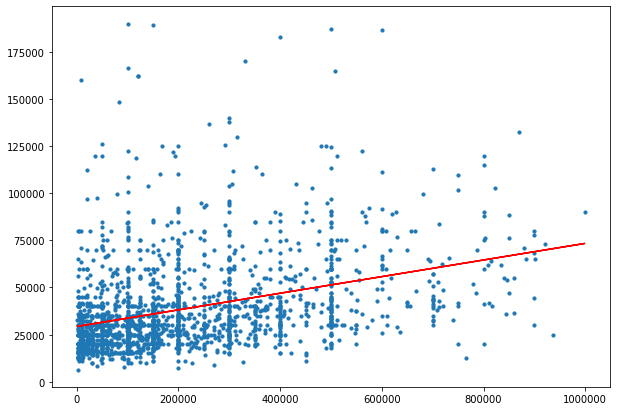

In [54]:
data = train_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[(data.personal_loan_max < 1000000) & (data.personal_loan_max > 1000)]
# data = data[data['personal_loan_total'] < data['salary']*80]
# data = data[(data['personal_loan_total'] > data['salary'])&(data['salary']<100000)]
print("sample count",len(data.index))
print("personal_loan_max:- ",data['personal_loan_max'].corr(data['salary']))
x_train = data[['personal_loan_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 1068
personal_loan_max:-  0.21878135737090604
model score : -0.043993869070914515


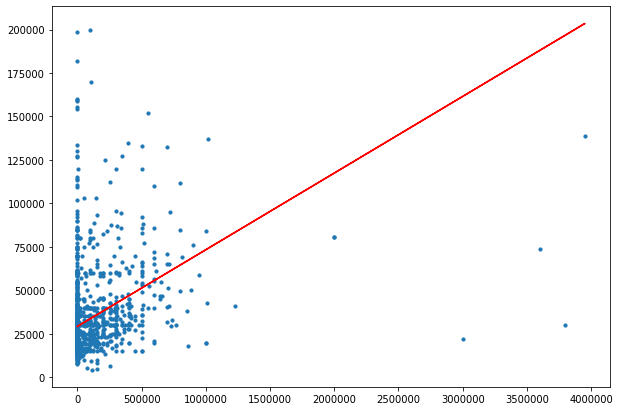

In [55]:
data = test_data.copy()
data.replace(0, np.nan, inplace=True)
data.loc[~((data['personal_loan_max'] < 9000000) & (data['personal_loan_max'] > 1000)), 'personal_loan_max'] = 0
print("sample count",len(data.index))
print("personal_loan_max:- ",data['personal_loan_max'].corr(data['salary']))
x_test = data[['personal_loan_max']]
y_test = data[['salary']]
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()
test_data['pred_personal_loan_max'] = y_pred
test_data.loc[~((test_data['personal_loan_max'] < 9000000) & (test_data['personal_loan_max'] > 1000)), 'pred_personal_loan_max'] = np.nan

sample count 928
auto(p)_loan_max:-  0.23646806385935332
model score : 0.05591714522539126


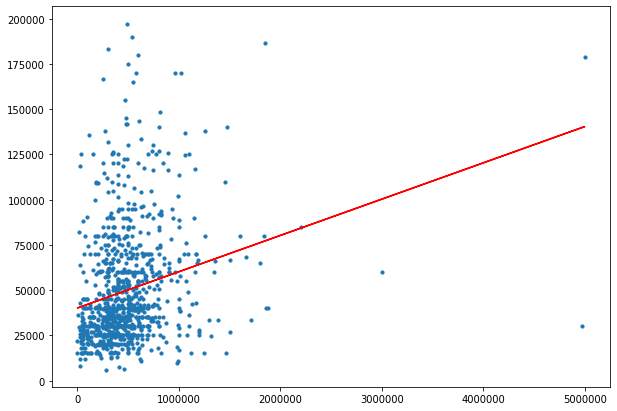

In [14]:
data = train_data.copy()
data.replace(0, np.nan, inplace=True)
data = data[data['auto(p)_loan_max'].notnull()]
data = data[(data['auto(p)_loan_max'] < 9000000) & (data['auto(p)_loan_max'] > 1000)]
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("auto(p)_loan_max:- ",data['auto(p)_loan_max'].corr(data['salary']))
x_train = data[['auto(p)_loan_max']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

1068
sample count 1068
auto(p)_loan_max:-  0.28518568447808534
model score : 0.034443675953526265


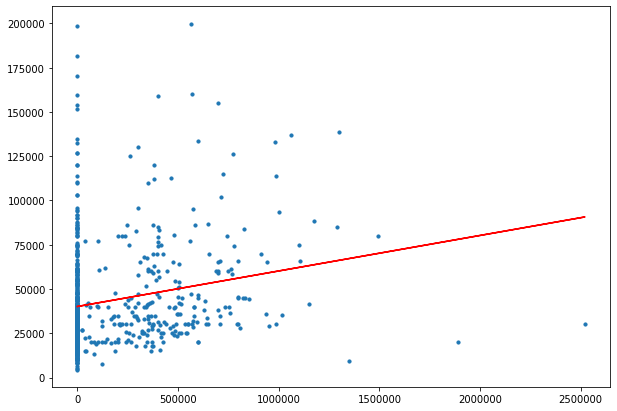

In [15]:
data = test_data.copy()
print(len(data.index))
data.replace(0, np.nan, inplace=True)
data.loc[~((data['auto(p)_loan_max'] < 9000000) & (data['auto(p)_loan_max'] > 1000)), 'auto(p)_loan_max'] = 0
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
print("auto(p)_loan_max:- ",data['auto(p)_loan_max'].corr(data['salary']))
x_test = data[['auto(p)_loan_max']]
y_test = data[['salary']]
y_pred = model.predict(x_test)
print("model score :", model.score(x_test, y_test))
plt.figure(figsize=(10,7))
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, y_pred, color='r')
plt.show()
test_data['pred_auto(p)_loan_max'] = y_pred
test_data.loc[~((test_data['auto(p)_loan_max'] < 9000000) & (test_data['auto(p)_loan_max'] > 1000)), 'pred_auto(p)_loan_max'] = np.nan

In [0]:
test_data['predicted'] = test_data[['pred_housing_loan_max']]
test_data['predicted'].replace(0, np.nan, inplace=True)
test_data['predicted_cat'] = test_data['predicted'].apply(lambda x: 'nan' if x == 0 else ("low" if x<24000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
test_data['salary_cat'] = test_data['salary'].apply(lambda x: 'nan' if x == 0 else ("low" if x<24000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
test_data[['salary', 'salary_cat','predicted','predicted_cat']].to_csv('result.csv')


sample count 4272
sample count 2965
secured_total:-  0.38341525451717184
model score : 0.14700725739646756


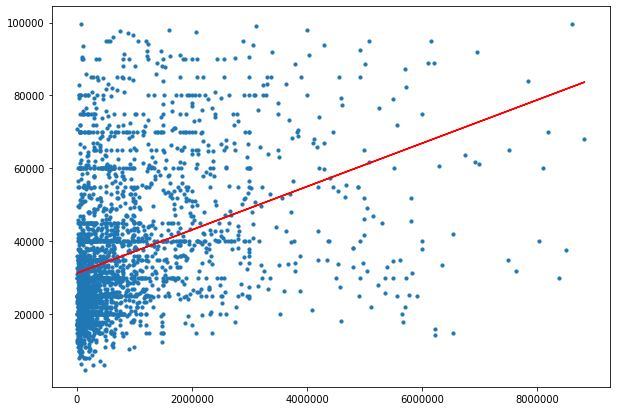

In [131]:
data = train_data.copy()
# data.replace(0, np.nan, inplace=True)
# data = data[data['hp_max'] < data['income']*100]
print("sample count",len(data.index))
data['secured_total'] = data[['housing_loan_total','twowheeler_loan_total','personal_loan_total','auto(p)_loan_total']].max(axis=1)
data = data[(data['secured_total']< 9000000) & (data['secured_total'] > 5000)]
data = data[data['salary'] <100000]
print("sample count",len(data.index))
print("secured_total:- ",data['secured_total'].corr(data['salary']))
x_train = data[['secured_total']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()

sample count 4268
sample count 2050
secured_total:-  0.42838651773429853
model score : -0.20445004439402625


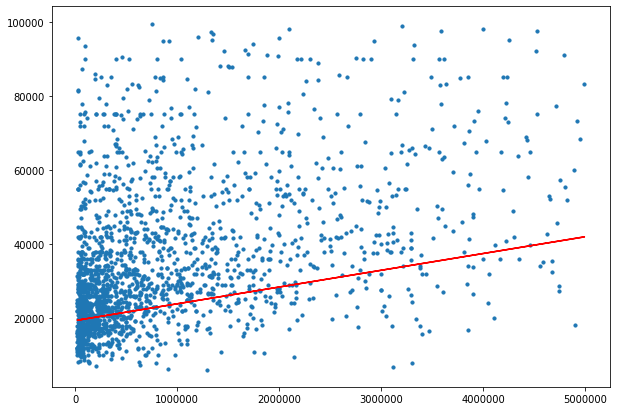

In [5]:
data = train_data.copy()
print("sample count",len(data.index))
data['secured_total'] = data.filter(like='_loan_total').sum(axis=1)
data = data[(data['secured_total']< 5000000) & (data['secured_total'] > 20000)]
data = data[(data['salary'] < 100000)&(~data['salary'].isin([15000,25000,35000,45000,20000,30000,40000,50000,60000,70000,80000]))]
print("sample count",len(data.index))
print("secured_total:- ",data['secured_total'].corr(data['salary']))
x_train = data[['secured_total']]
y_train = data[['salary']]
model = linear_model.RANSACRegressor(linear_model.LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()



sample count 1068
sample count 1068
secured_total:-  0.27218728905040296
model score : -0.2632326887570986


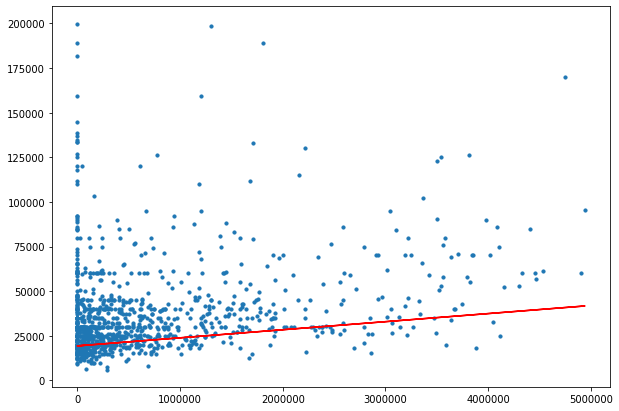

In [6]:
data = test_data.copy()
print("sample count",len(data.index))
data['secured_total'] = data.filter(like='_loan_total').sum(axis=1)
data.loc[~((data['secured_total']< 5000000) & (data['secured_total'] > 20000)), 'secured_total'] = 0
print("sample count",len(data.index))
print("secured_total:- ",data['secured_total'].corr(data['salary']))
x_train = data[['secured_total']]
y_train = data[['salary']]
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
test_data['pred_secured_total'] = y_pred
test_data.loc[~((test_data['pred_secured_total'] < 5000000) & (test_data['pred_secured_total'] > 20000)), 'pred_secured_total'] = np.nan

In [0]:
test_data['predicted'] = test_data[['pred_secured_total']]
test_data['predicted'].replace(0, np.nan, inplace=True)
test_data['predicted_cat'] = test_data['predicted'].apply(lambda x: 'nan' if x == 0 else ("low" if x<24000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
test_data['salary_cat'] = test_data['salary'].apply(lambda x: 'nan' if x == 0 else ("low" if x<24000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
test_data[['salary', 'salary_cat','predicted','predicted_cat']].to_csv('result.csv')

sample count 5336
sample count 4694
unsecured_total:-  0.3327018287807464
model score : 0.11069050687405302


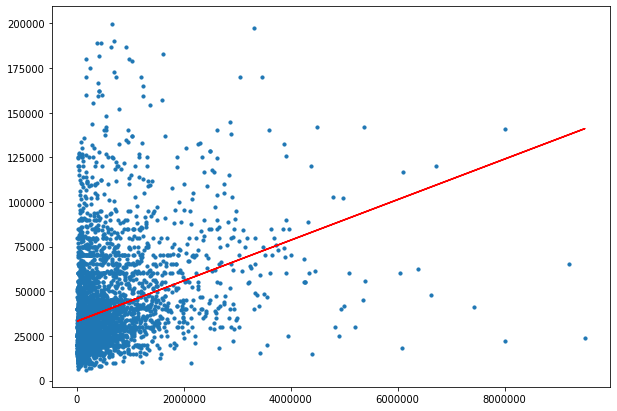

4694
44.35449510012782
high: 328
medium: 2346
low: 2020


In [27]:
data = backup_data.copy()
# data.replace(0, np.nan, inplace=True)
print("sample count",len(data.index))
data['unsecured_total'] = data['personal_loan_total'] + data['consumer_loan_total'] + data['education_loan_total']+data['unsecuredbusiness_loan_total']+data['other_loan_total']+data['credit_card_total']
data = data[(data['unsecured_total']< 9900000) & (data['unsecured_total'] > 10000)]
print("sample count",len(data.index))
print("unsecured_total:- ",data['unsecured_total'].corr(data['salary']))
x_train = data[['unsecured_total']]
y_train = data[['salary']]
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("model score :", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
data['pred_secured_total'] = y_pred
data['pred_secured_total'] -= 10000
data['predicted'] = data[['pred_secured_total']]
data['predicted_cat'] = data['predicted'].apply(lambda x: 'nan' if x < 4000 else ("low" if x<25000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
data['salary_cat'] = data['salary'].apply(lambda x: 'nan' if x <4000 else ("low" if x<25000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
data['check_result'] = np.where(data['predicted_cat'] == data['salary_cat'],1, 0)
print(len(data.index))
print(data['check_result'].sum() * 100 / len(data.index))
print("high:",len(data[data['predicted_cat'] == 'high']))
print("medium:",len(data[data['predicted_cat'] == 'medium']))
print("low:",len(data[data['predicted_cat'] == 'low']))

Total count :            5336
Sample count used for modelling : 4928
Correlation :-       0.14256106088381332
Model score :-      -0.18372037440406186


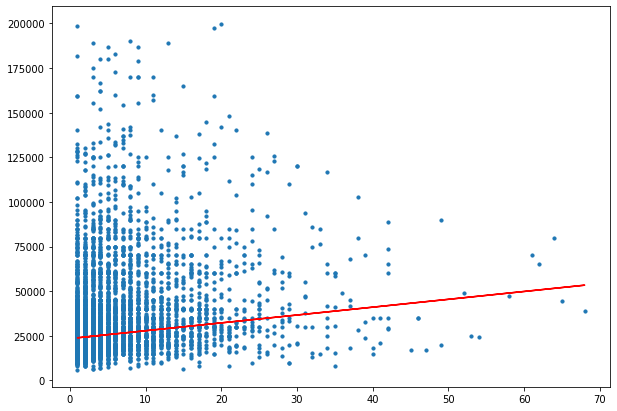

4928
Correctly predicted (in %) :  40.401785714285715
Predicted as high    :-       33
Predicted as medium  :-       2737
Predicted as low     :-       2158


In [68]:
data = backup_data.copy()
# data.replace(0, np.nan, inplace=True)
print("Total count :           ",len(data.index))
data['loan_count_total'] = data.filter(like='_loan_count').sum(axis=1)
data = data[(data['loan_count_total']< 70) & (data['loan_count_total'] > 0)]
print("Sample count used for modelling :",len(data.index))
print("Correlation :-      ",data['loan_count_total'].corr(data['salary']))
x_train = data[['loan_count_total']]
y_train = data[['salary']]
model = linear_model.RANSACRegressor(linear_model.LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print("Model score :-     ", model.score(x_train, y_train))
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=10)
plt.plot(x_train, y_pred, color='r')
plt.show()
data['pred_loan_count_total'] = y_pred
# data['pred_loan_count_total'] += 8000
data['predicted'] = data[['pred_loan_count_total']]
data['predicted_cat'] = data['predicted'].apply(lambda x: 'nan' if x < 4000 else ("low" if x<25000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
data['salary_cat'] = data['salary'].apply(lambda x: 'nan' if x <4000 else ("low" if x<25000 else ("medium" if x<=40000 else ("high" if x<10000000 else 'nan'))))
data['check_result'] = np.where(data['predicted_cat'] == data['salary_cat'],1, 0)
print(len(data.index))
print("Correctly predicted (in %) : ",data['check_result'].sum() * 100 / len(data.index))
print("Predicted as high    :-      ",len(data[data['predicted_cat'] == 'high']))
print("Predicted as medium  :-      ",len(data[data['predicted_cat'] == 'medium']))
print("Predicted as low     :-      ",len(data[data['predicted_cat'] == 'low']))

In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<20000 else (1 if x<40000 else 2))
l1 = 'loan_total_total'
l2 = 'housing_loan_max'
# l3 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'other_loan_max'
e1 = 'emi_total_total'
e2 = 'housing_emi_max'
# e3 = 'property_emi_max'
e3 = 'personal_lemi_max'
e4 = 'auto(p)_emi_max'
e5 = 'other_emi_max'
c1 = 'credit_card_max'
c2 = 'credit_card_max'
c = 0
for i in range(80,90,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(20,30,5):
    p_j = np.nanpercentile(data[l1],j)
    for k in range(80,90,5):
      p_k = np.nanpercentile(data[l2],k)
      for l in range(20,30,5):
        p_l = np.nanpercentile(data[l2],l)
        for m in range(80,85,5):
          p_m = np.nanpercentile(data[l3],m)
          for n in range(20,30,5):
            p_n = np.nanpercentile(data[l3],n)
            for o in range(80,85,5):
              p_o = np.nanpercentile(data[l4],o)
              for p in range(20,30,5):
                p_p = np.nanpercentile(data[l4],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l5],q)
                  for r in range(20,30,5):
                    p_r = np.nanpercentile(data[l5],r)
                    for s in range(80,85,5):
                      p_s = np.nanpercentile(data[c1],s)
                      for t in range(20,30,5):
                        p_t = np.nanpercentile(data[c1],t)
                        data['predicted_category'] = 0                      
                        data.loc[((data[l1] > p_j)|(data[l2] > p_l)|(data[l3] > p_n)|(data[l4] > p_p)|(data[l5] > p_r)|(data[c1] > p_t)), 'predicted_category'] = 1
                        data.loc[(data[l1] > p_i)|(data[l2] > p_k)|(data[l3] > p_m)|(data[l4] > p_o)|(data[l5] > p_q)|(data[c1] > p_s), 'predicted_category'] = 2

                        le = len(data[data.predicted_category == data.salary_category])
                        if c < le:
                          c = le
                          c_index = l1+str(i)+str(j)+" "+l2+str(k)+str(l)+" "+l3+str(m)+str(n)+" "+l4+str(o)+str(p)+" "+l5+str(q)+str(r)+" "+c1+str(s)+str(t)
                          counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<20000 else (1 if x<40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
e0 = 'emi_total_total'
e1 = 'housing_emi_max'
e2 = 'property_emi_max'
e3 = 'personal_emi_max'
e4 = 'auto(p)_emi_max'
e5 = 'consumer_emi_max'
e6 = 'gold_emi_max'
e7 = 'education_emi_max'
e8 = 'twowheeler_emi_max'
e9 = 'againstdeposit_emi_max'
e10 = 'commercialvehicle_emi_max'
e11 = 'usedcar_emi_max'
e12 = 'generalbusiness_emi_max'
e13 = 'prioritybusiness_emi_max'
e14 = 'other_emi_max'
c2 = 'overdraft_max'
c = 0
for i,ei in itertools.product(range(55,65,5),range(60,65,5)):
  p_i = np.nanpercentile(data[l1],i)
  p_ei = np.nanpercentile(data[e1],ei)
  for j,ej in itertools.product(range(55,65,5),range(60,65,5)):
    p_j = np.nanpercentile(data[l2],j)
    p_ej = np.nanpercentile(data[e2],ej)
    for k,ek in itertools.product(range(80,81,5),range(85,86,5)):
      p_k = np.nanpercentile(data[l3],k)
      p_ek = np.nanpercentile(data[e3],ek)
      for l,el in itertools.product(range(70,75,5),range(75,80,5)):
        p_l = np.nanpercentile(data[l4],l)
        p_el = np.nanpercentile(data[e4],el)
        for m,em in itertools.product(range(99,100,1),range(100,101,1)):
          p_m = np.nanpercentile(data[l5],m)
          p_em = np.nanpercentile(data[e5],em)
          for n,en in itertools.product(range(85,86,4),range(90,94,4)):
            p_n = np.nanpercentile(data[l6],n)
            p_en = np.nanpercentile(data[e6],en)
            for o,eo in itertools.product(range(70,75,5),range(75,80,5)):
              p_o = np.nanpercentile(data[l7],o)
              p_eo = np.nanpercentile(data[e7],eo)
              for p,ep in itertools.product(range(100,101,1),range(100,101,1)):
                p_p = np.nanpercentile(data[l8],p)
                p_ep = np.nanpercentile(data[e8],ep)
                for q,eq in itertools.product(range(80,85,5),range(85,90,5)):
                  p_q = np.nanpercentile(data[l9],q)
                  p_eq = np.nanpercentile(data[e9],eq)
                  for r,er in itertools.product(range(80,85,5),range(85,90,5)):
                    p_r = np.nanpercentile(data[l10],r)
                    p_er = np.nanpercentile(data[e0],er)
                    for s,es in itertools.product(range(75,80,5),range(80,85,5)):
                      p_s = np.nanpercentile(data[l11],s)
                      p_es = np.nanpercentile(data[e11],es)
                      for t,et in itertools.product(range(80,85,5),range(85,90,5)):
                        p_t = np.nanpercentile(data[l12],t)
                        p_et = np.nanpercentile(data[e12],et)
                        for u,eu in itertools.product(range(80,85,5),range(85,90,5)):
                          p_u = np.nanpercentile(data[l13],u)
                          p_eu = np.nanpercentile(data[e13],eu)
                          for v,ev in itertools.product(range(90,91,4),range(95,96,4)):
                            p_v = np.nanpercentile(data[l14],v)
                            p_ev = np.nanpercentile(data[e14],ev)
                            for w,ew in itertools.product(range(99,100,1),range(100,101,1)):
                              p_w = np.nanpercentile(data[l0],w)
                              p_ew = np.nanpercentile(data[e0],ew)
                              for x,y in itertools.product(range(90,91,4),range(98,100,1)):
                                p_x = np.nanpercentile(data[c1],x)
                                p_y = np.nanpercentile(data[c2],y)
                                data['predicted_category'] = 1
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[e1] > p_ei)|(data[e2] > p_ej)|(data[e3] > p_ek)|(data[e4] > p_el)|(data[e5] > p_em)|(data[e6] > p_en)|(data[e7] > p_eo)|(data[e8] > p_ep)|(data[e9] > p_eq)|(data[e10] > p_er)|(data[e11] > p_es)|(data[e12] > p_et)|(data[e13] > p_eu)|(data[e14] > p_ev)|(data[e0] > p_ew)|(data[c2] > p_y)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts

In [0]:
data = backup_data.copy()
print(len(data.index))
data['predicted_category'] = "low"
data['salary_category'] = data['salary'].apply(lambda x: 0 if x<20000 else (1 if x<40000 else 2))
l0 = 'loan_total_total'
l1 = 'housing_loan_max'
l2 = 'property_loan_max'
l3 = 'personal_loan_max'
l4 = 'auto(p)_loan_max'
l5 = 'consumer_loan_max'
l6 = 'gold_loan_max'
l7 = 'education_loan_max'
l8 = 'twowheeler_loan_max'
l9 = 'againstdeposit_loan_max'
l10 = 'commercialvehicle_loan_max'
l11 = 'usedcar_loan_max'
l12 = 'generalbusiness_loan_max'
l13 = 'prioritybusiness_loan_max'
l14 = 'other_loan_max'
c1 = 'credit_card_max'
c2 = 'overdraft_max'
c = 0

for i in range(100,101,1):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(100,101,1):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(20,40,10):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(100,101,1):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(100,101,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(30,40,10):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(100,101,1):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(20,40,10):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(100,101,1):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(20,40,10):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(20,50,10):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(10,50,10):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(30,60,10):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(40,100,10):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(20,50,10):
                                p_x = np.nanpercentile(data[c1],x)
                                for y in range(20,40,10):
                                  p_y = np.nanpercentile(data[c2],y)
                                  data['predicted_category'] = 0
                                  data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)|(data[c2] > p_y)), 'predicted_category'] = 1

                                  le = len(data[data.predicted_category == data.salary_category])
                                  if c < le:
                                    c = le
                                    c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)+" "+c2+str(y)
                                    counts = data.predicted_category.value_counts()
                                    data['predicted1'] = data['predicted_category']

print(c)
print(c_index)
print(data.salary_category.value_counts())
print(counts)
c = 0
for i in range(55,65,5):
  p_i = np.nanpercentile(data[l1],i)
  for j in range(55,65,5):
    p_j = np.nanpercentile(data[l2],j)
    for k in range(80,81,5):
      p_k = np.nanpercentile(data[l3],k)
      for l in range(70,75,5):
        p_l = np.nanpercentile(data[l4],l)
        for m in range(99,100,1):
          p_m = np.nanpercentile(data[l5],m)
          for n in range(85,86,4):
            p_n = np.nanpercentile(data[l6],n)
            for o in range(70,75,5):
              p_o = np.nanpercentile(data[l7],o)
              for p in range(100,101,1):
                p_p = np.nanpercentile(data[l8],p)
                for q in range(80,85,5):
                  p_q = np.nanpercentile(data[l9],q)
                  for r in range(80,85,5):
                    p_r = np.nanpercentile(data[l10],r)
                    for s in range(75,80,5):
                      p_s = np.nanpercentile(data[l11],s)
                      for t in range(80,85,5):
                        p_t = np.nanpercentile(data[l12],t)
                        for u in range(80,85,5):
                          p_u = np.nanpercentile(data[l13],u)
                          for v in range(90,91,4):
                            p_v = np.nanpercentile(data[l14],v)
                            for w in range(98,100,1):
                              p_w = np.nanpercentile(data[l0],w)
                              for x in range(90,91,4):
                                p_x = np.nanpercentile(data[c1],x)
                                data['predicted_category'] = data['predicted1']
                                data.loc[((data[l1] > p_i)|(data[l2] > p_j)|(data[l3] > p_k)|(data[l4] > p_l)|(data[l5] > p_m)|(data[l6] > p_n)|(data[l7] > p_o)|(data[l8] > p_p)|(data[l9] > p_q)|(data[l10] > p_r)|(data[l11] > p_s)|(data[l12] > p_t)|(data[l13] > p_u)|(data[l14] > p_v)|(data[l0] > p_w)|(data[c1] > p_x)), 'predicted_category'] = 2

                                le = len(data[data.predicted_category == data.salary_category])
                                if c < le:
                                  c = le
                                  c_index = l1+str(i)+" "+l2+str(j)+" "+l3+str(k)+" "+l4+str(l)+" "+l5+str(m)+" "+l6+str(n)+" "+l7+str(o)+" "+l8+str(p)+" "+l9+str(q)+" "+l10+str(r)+" "+l11+str(s)+" "+l12+str(t)+" "+l13+str(u)+" "+l14+str(v)+" "+l0+str(w)+" "+c1+str(x)
                                  counts = data.predicted_category.value_counts()

print(c)
print(c_index)
print(data.salary_category.value_counts())
counts